In [55]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
with open(r"C:\CV\TSAI_Course\TSAI-EVA5\Week12\Hardhat,boots,vest,mask_coco.json") as f:
    data = json.load(f)

In [41]:
data.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

In [42]:
image_df = DataFrame(data['images'])
image_df

,id,width,height,file_name,license,date_captured
0,1,3497,2564,1.jpeg,0,
1,2,620,300,2.jpeg,0,
2,3,1026,1390,3.jpeg,0,
3,4,356,470,4.jpeg,0,
4,5,1139,1600,5.jpeg,0,
...,...,...,...,...,...,...
66,67,3475,2312,bootsA_1.jpeg,0,
67,68,275,183,bootsA_2.jpeg,0,
68,69,183,275,bootsA_3.jpeg,0,
69,70,300,168,bootsA_4.jpeg,0,


In [43]:
annotations_df = DataFrame(data['annotations'])
annotations_df

,segmentation,area,bbox,iscrowd,id,image_id,category_id
0,"[[1426, 336, 2327, 336, 2327, 905, 1426, 905]]",512669,"[1426, 336, 901, 569]",0,1,1,1
1,"[[56, 9, 94, 9, 94, 35, 56, 35]]",988,"[56, 9, 38, 26]",0,2,2,1
2,"[[158, 27, 198, 27, 198, 57, 158, 57]]",1200,"[158, 27, 40, 30]",0,3,2,1
3,"[[224, 29, 261, 29, 261, 60, 224, 60]]",1147,"[224, 29, 37, 31]",0,4,2,1
4,"[[352, 23, 396, 23, 396, 57, 352, 57]]",1496,"[352, 23, 44, 34]",0,5,2,1
...,...,...,...,...,...,...,...
302,"[[1567, 116, 1947, 116, 1947, 443, 1567, 443]]",124260,"[1567, 116, 380, 327]",0,303,71,4
303,"[[73, 571, 410, 571, 410, 931, 73, 931]]",121320,"[73, 571, 337, 360]",0,304,71,4
304,"[[548, 628, 936, 628, 936, 925, 548, 925]]",115236,"[548, 628, 388, 297]",0,305,71,4
305,"[[1082, 568, 1432, 568, 1432, 931, 1082, 931]]",127050,"[1082, 568, 350, 363]",0,306,71,4


In [44]:
categories_df = DataFrame(data['categories'])
categories_df

,supercategory,id,name
0,class_name,1,hardhat
1,class_name,2,mask
2,class_name,3,vest
3,class_name,4,boots


In [45]:
anchor_boxes_df = annotations_df.copy()

In [46]:
bbox_df = DataFrame(item for item in anchor_boxes_df['bbox'])
bbox_df.columns = ['CX', 'CY', 'W', 'H']
bbox_df

,CX,CY,W,H
0,1426,336,901,569
1,56,9,38,26
2,158,27,40,30
3,224,29,37,31
4,352,23,44,34
...,...,...,...,...
302,1567,116,380,327
303,73,571,337,360
304,548,628,388,297
305,1082,568,350,363


In [47]:
anchor_boxes_df = pd.concat([anchor_boxes_df, bbox_df], axis=1)
anchor_boxes_df

,segmentation,area,bbox,iscrowd,id,image_id,category_id,CX,CY,W,H
0,"[[1426, 336, 2327, 336, 2327, 905, 1426, 905]]",512669,"[1426, 336, 901, 569]",0,1,1,1,1426,336,901,569
1,"[[56, 9, 94, 9, 94, 35, 56, 35]]",988,"[56, 9, 38, 26]",0,2,2,1,56,9,38,26
2,"[[158, 27, 198, 27, 198, 57, 158, 57]]",1200,"[158, 27, 40, 30]",0,3,2,1,158,27,40,30
3,"[[224, 29, 261, 29, 261, 60, 224, 60]]",1147,"[224, 29, 37, 31]",0,4,2,1,224,29,37,31
4,"[[352, 23, 396, 23, 396, 57, 352, 57]]",1496,"[352, 23, 44, 34]",0,5,2,1,352,23,44,34
...,...,...,...,...,...,...,...,...,...,...,...
302,"[[1567, 116, 1947, 116, 1947, 443, 1567, 443]]",124260,"[1567, 116, 380, 327]",0,303,71,4,1567,116,380,327
303,"[[73, 571, 410, 571, 410, 931, 73, 931]]",121320,"[73, 571, 337, 360]",0,304,71,4,73,571,337,360
304,"[[548, 628, 936, 628, 936, 925, 548, 925]]",115236,"[548, 628, 388, 297]",0,305,71,4,548,628,388,297
305,"[[1082, 568, 1432, 568, 1432, 931, 1082, 931]]",127050,"[1082, 568, 350, 363]",0,306,71,4,1082,568,350,363


In [48]:
anchor_boxes_df['image_width'] = pd.merge(anchor_boxes_df, image_df, left_on='image_id', right_on='id', how='left')['width']
anchor_boxes_df['image_height'] = pd.merge(anchor_boxes_df, image_df, left_on='image_id', right_on='id', how='left')['height']
anchor_boxes_df['class_label'] = pd.merge(anchor_boxes_df, categories_df, left_on='category_id', right_on='id', how='left')['name']
anchor_boxes_df

,segmentation,area,bbox,iscrowd,id,image_id,category_id,CX,CY,W,H,image_width,image_height,class_label
0,"[[1426, 336, 2327, 336, 2327, 905, 1426, 905]]",512669,"[1426, 336, 901, 569]",0,1,1,1,1426,336,901,569,3497,2564,hardhat
1,"[[56, 9, 94, 9, 94, 35, 56, 35]]",988,"[56, 9, 38, 26]",0,2,2,1,56,9,38,26,620,300,hardhat
2,"[[158, 27, 198, 27, 198, 57, 158, 57]]",1200,"[158, 27, 40, 30]",0,3,2,1,158,27,40,30,620,300,hardhat
3,"[[224, 29, 261, 29, 261, 60, 224, 60]]",1147,"[224, 29, 37, 31]",0,4,2,1,224,29,37,31,620,300,hardhat
4,"[[352, 23, 396, 23, 396, 57, 352, 57]]",1496,"[352, 23, 44, 34]",0,5,2,1,352,23,44,34,620,300,hardhat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,"[[1567, 116, 1947, 116, 1947, 443, 1567, 443]]",124260,"[1567, 116, 380, 327]",0,303,71,4,1567,116,380,327,2000,1000,boots
303,"[[73, 571, 410, 571, 410, 931, 73, 931]]",121320,"[73, 571, 337, 360]",0,304,71,4,73,571,337,360,2000,1000,boots
304,"[[548, 628, 936, 628, 936, 925, 548, 925]]",115236,"[548, 628, 388, 297]",0,305,71,4,548,628,388,297,2000,1000,boots
305,"[[1082, 568, 1432, 568, 1432, 931, 1082, 931]]",127050,"[1082, 568, 350, 363]",0,306,71,4,1082,568,350,363,2000,1000,boots


In [52]:
anchor_boxes_df['cx'] = anchor_boxes_df['CX']/anchor_boxes_df['image_width']
anchor_boxes_df['cy'] = anchor_boxes_df['CY']/anchor_boxes_df['image_height']
anchor_boxes_df['w'] = anchor_boxes_df['W']/anchor_boxes_df['image_width']
anchor_boxes_df['h'] = anchor_boxes_df['H']/anchor_boxes_df['image_height']

In [53]:
anchor_boxes_df

,segmentation,area,bbox,iscrowd,id,image_id,category_id,CX,CY,W,H,image_width,image_height,class_label,cx,cy,w,h
0,"[[1426, 336, 2327, 336, 2327, 905, 1426, 905]]",512669,"[1426, 336, 901, 569]",0,1,1,1,1426,336,901,569,3497,2564,hardhat,0.407778,0.131045,0.257649,0.221919
1,"[[56, 9, 94, 9, 94, 35, 56, 35]]",988,"[56, 9, 38, 26]",0,2,2,1,56,9,38,26,620,300,hardhat,0.090323,0.030000,0.061290,0.086667
2,"[[158, 27, 198, 27, 198, 57, 158, 57]]",1200,"[158, 27, 40, 30]",0,3,2,1,158,27,40,30,620,300,hardhat,0.254839,0.090000,0.064516,0.100000
3,"[[224, 29, 261, 29, 261, 60, 224, 60]]",1147,"[224, 29, 37, 31]",0,4,2,1,224,29,37,31,620,300,hardhat,0.361290,0.096667,0.059677,0.103333
4,"[[352, 23, 396, 23, 396, 57, 352, 57]]",1496,"[352, 23, 44, 34]",0,5,2,1,352,23,44,34,620,300,hardhat,0.567742,0.076667,0.070968,0.113333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,"[[1567, 116, 1947, 116, 1947, 443, 1567, 443]]",124260,"[1567, 116, 380, 327]",0,303,71,4,1567,116,380,327,2000,1000,boots,0.783500,0.116000,0.190000,0.327000
303,"[[73, 571, 410, 571, 410, 931, 73, 931]]",121320,"[73, 571, 337, 360]",0,304,71,4,73,571,337,360,2000,1000,boots,0.036500,0.571000,0.168500,0.360000
304,"[[548, 628, 936, 628, 936, 925, 548, 925]]",115236,"[548, 628, 388, 297]",0,305,71,4,548,628,388,297,2000,1000,boots,0.274000,0.628000,0.194000,0.297000
305,"[[1082, 568, 1432, 568, 1432, 931, 1082, 931]]",127050,"[1082, 568, 350, 363]",0,306,71,4,1082,568,350,363,2000,1000,boots,0.541000,0.568000,0.175000,0.363000


[Text(0, 0.5, 'log(h)'),
 Text(0.5, 0, 'log(w)'),
 Text(0.5, 1.0, 'Plot of log(h) vs log(w)')]

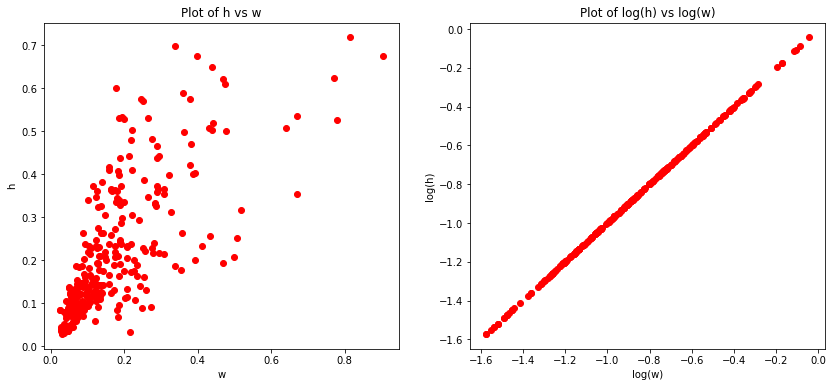

In [72]:
fig,ax = plt.subplots(1, 2, figsize = (14, 6))
axis = ax.flatten()
axis[0].scatter(anchor_boxes_df['w'], anchor_boxes_df['h'], color='red')
axis[0].set(xlabel = 'w', ylabel='h', title = 'Plot of h vs w')
axis[1].scatter(np.log10(anchor_boxes_df['w']), np.log10(anchor_boxes_df['w']), color='red')
axis[1].set(xlabel = 'log(w)', ylabel='log(h)', title = 'Plot of log(h) vs log(w)')

In [62]:
anchor_boxes_df.class_label.value_counts()

boots      96
mask       76
hardhat    75
vest       60
Name: class_label, dtype: int64